In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from random import choices

# Look at the data

In [74]:
df=pd.read_csv('../listings.csv')
dfgz = pd.read_csv('../listings.csv.gz')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


In [77]:
np.shape(dfgz)

(38277, 74)

In [4]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.827700e+04,3.827700e+04,3.827700e+04,38243.000000,38243.000000,38277.000000,38277.000000,38277.000000,0.0,34302.000000,...,28172.000000,28154.000000,28165.000000,28151.000000,28150.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000
mean,2.962239e+07,2.021120e+13,1.148305e+08,49.020056,49.020056,40.729206,-73.948967,2.792094,NaN,1.323567,...,4.612408,4.813884,4.807454,4.750307,4.646892,17.747655,8.042637,9.593934,0.047966,1.721019
std,1.742239e+07,3.293012e+00,1.299194e+08,312.947661,312.947661,0.055752,0.050759,1.869736,NaN,0.708327,...,0.575452,0.439260,0.465544,0.416101,0.518905,59.150451,34.977178,43.310123,0.426789,4.399826
min,2.595000e+03,2.021120e+13,2.438000e+03,0.000000,0.000000,40.504560,-74.249840,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.341048e+07,2.021120e+13,1.139462e+07,1.000000,1.000000,40.689260,-73.983270,2.000000,NaN,1.000000,...,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.081269e+07,2.021120e+13,5.005297e+07,1.000000,1.000000,40.725180,-73.954770,2.000000,NaN,1.000000,...,4.800000,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.480000
75%,4.642855e+07,2.021120e+13,2.002395e+08,3.000000,3.000000,40.762680,-73.930430,4.000000,NaN,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.780000
max,5.366510e+07,2.021120e+13,4.344080e+08,3750.000000,3750.000000,40.914020,-73.710870,16.000000,NaN,16.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000


# Prepare the data

In [13]:
null_table = df.isnull().sum()

In [26]:
null_table.sort_values(ascending=False)

bathrooms                       38277
calendar_updated                38277
license                         38276
host_response_time              17193
host_response_rate              17193
                                ...  
latitude                            0
neighbourhood_group_cleansed        0
neighbourhood_cleansed              0
availability_60                     0
id                                  0
Length: 74, dtype: int64

In [30]:
null_table.bathrooms

38277

In [67]:
## Delete the useless variable(many missing values or meaningless to the problem)
df2 = df.drop(columns=['bathrooms','calendar_updated', 'license',
                      'listing_url','scrape_id','last_scraped',
                      'picture_url','host_url','host_location','host_about',
                      'host_thumbnail_url','host_picture_url',
                      'neighbourhood','neighborhood_overview',
                      'first_review', 'last_review'])

## bathrooms_text need to be transformed

In [68]:
df2.columns

Index(['id', 'name', 'description', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'l

In [103]:
## delete the % in rate variable
df2.host_response_rate = df2['host_response_rate'].str.strip("%").astype(float)

In [64]:
null_table2 = df2.isnull().sum().sort_values(ascending=False)

In [65]:
null_table2

host_response_rate       17193
host_response_time       17193
host_acceptance_rate     16486
neighborhood_overview    15627
review_scores_value      10127
                         ...  
minimum_nights               0
price                        0
amenities                    0
accommodates                 0
id                           0
Length: 61, dtype: int64

In [80]:
import seaborn as sns

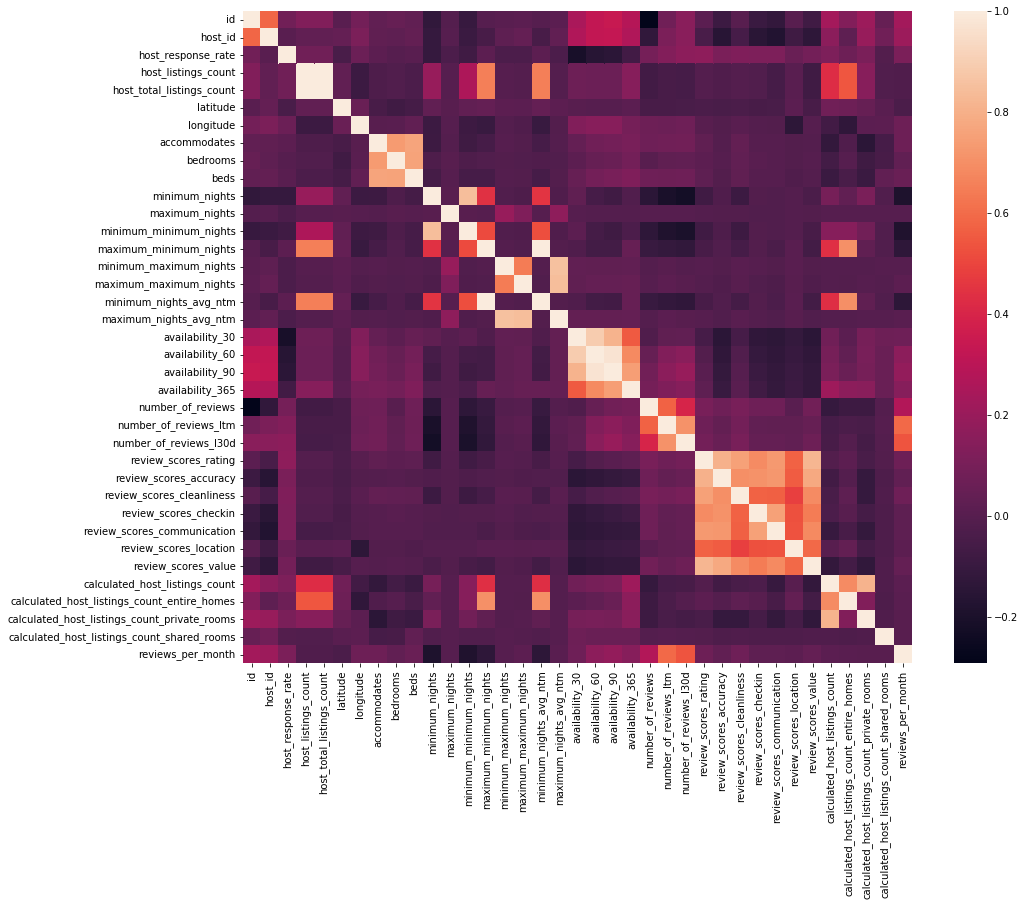

In [104]:
corr = df2.corr()
fig,ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, annot=False)
plt.show()

In [84]:
np.shape(df2)

(38277, 60)

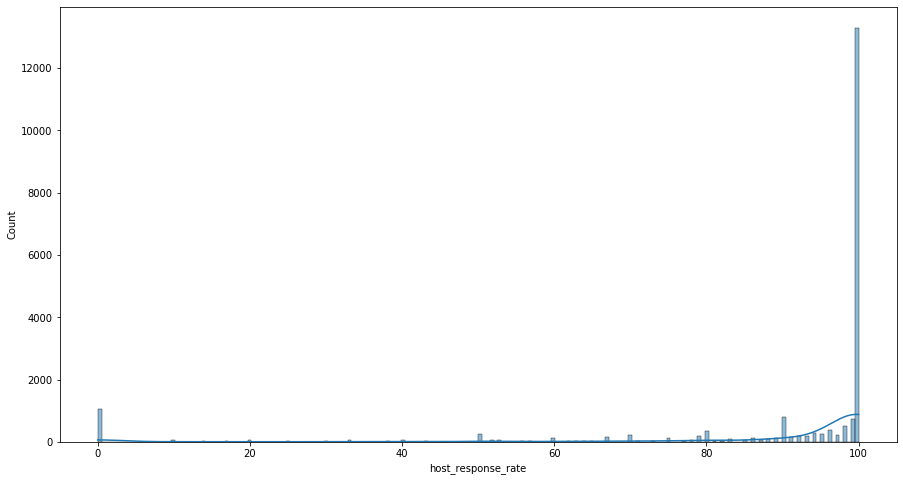

In [105]:
plt.figure(figsize=(15,8))
sns.histplot(x=df2.host_response_rate,kde=True)

In [111]:
# drop rows with nan in "host_response_rate/time" feature
df2.dropna(subset=['host_response_rate','host_response_time'],inplace=True)

In [112]:
np.shape(df2)

(21084, 60)

In [113]:
df2.isna().sum()

id                                                 0
name                                               0
description                                      652
host_id                                            0
host_name                                          0
host_since                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                             711
host_is_superhost                                  0
host_neighbourhood                              4305
host_listings_count                                0
host_total_listings_count                          0
host_verifications                                 0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                       0
latitude                                      

In [100]:
df2.dropna(subset=['host_acceptance_rate','host_response_time'],inplace=True)
df2.isna().sum()

count     21084
unique       88
top        100%
freq      13299
Name: host_response_rate, dtype: object

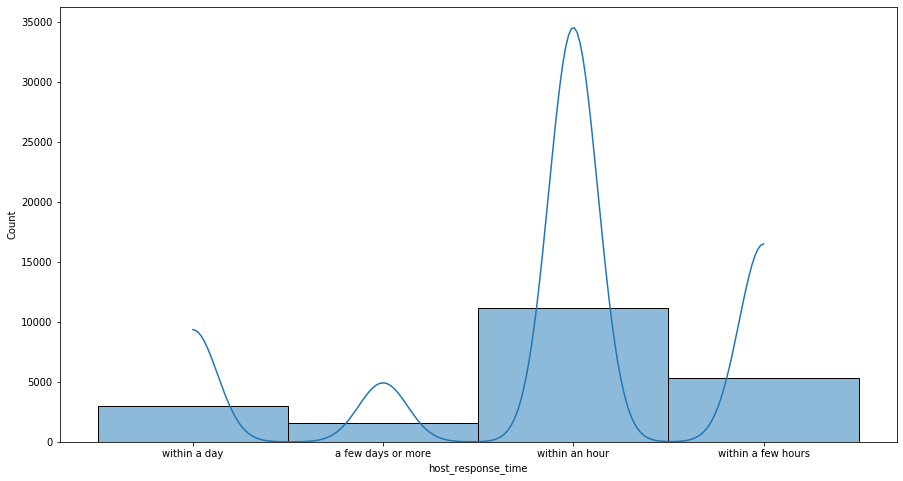

In [91]:
plt.figure(figsize=(15,8))
sns.histplot(x=df2.host_response_time,kde=True)

we decided to separate the data into those with rewiew and without review

In [117]:
df_without_review = df2[df2.first_review.isna()]
np.shape(df_without_review)

(4769, 60)

In [120]:
df_with_review = df2[-df2.first_review.isna()]
np.shape(df_with_review)

(16315, 60)

## deal with missing value and variables

### df_without_review

In [127]:
df_without_review = df_without_review.drop(columns=['first_review','last_review', 'review_scores_rating',
                                                    'review_scores_rating', 'review_scores_accuracy',
                                                    'review_scores_cleanliness', 'review_scores_checkin',
                                                    'review_scores_communication', 'review_scores_location',
                                                    'review_scores_value','reviews_per_month'])

KeyError: "['first_review' 'last_review' 'review_scores_rating'\n 'review_scores_rating' 'review_scores_accuracy'\n 'review_scores_cleanliness' 'review_scores_checkin'\n 'review_scores_communication' 'review_scores_location'\n 'review_scores_value' 'reviews_per_month'] not found in axis"

In [128]:
df_without_review = df_without_review.drop(columns=['number_of_reviews', 'number_of_reviews_ltm',
                                                    'number_of_reviews_l30d'])
np.shape(df_without_review)

(4769, 47)

In [135]:
df_without_review = df_without_review.drop(columns=['id', 'host_id',
                                                    'name','description','host_since'])
np.shape(df_without_review)

(4769, 42)

In [138]:
df_without_review = df_without_review.drop(columns=['host_neighbourhood'])

In [139]:
df_without_review.describe()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,...,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4265.000000,4331.000000,4769.000000,4769.000000,...,4766.000000,4.766000e+03,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,84.209268,284.136716,284.136716,40.733054,-73.952392,2.840218,1.390152,1.597553,27.691969,622.861606,...,64.438649,3.814458e+06,12.373244,32.084294,52.837912,225.356679,47.465506,25.338855,21.998742,0.057035
std,30.677341,794.878642,794.878642,0.052399,0.050678,2.125481,0.855507,1.189789,39.251348,460.233625,...,158.673808,8.345579e+07,11.715317,22.532081,32.801843,134.370868,79.878639,71.682334,46.847255,0.435063
min,0.000000,0.000000,0.000000,40.522240,-74.207390,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,89.000000,1.000000,1.000000,40.698750,-73.987156,2.000000,1.000000,1.000000,4.000000,270.000000,...,4.000000,3.650000e+02,0.000000,6.000000,25.000000,88.000000,1.000000,0.000000,0.000000,0.000000
50%,100.000000,3.000000,3.000000,40.741167,-73.960660,2.000000,1.000000,1.000000,30.000000,365.000000,...,30.000000,1.125000e+03,9.000000,35.000000,63.000000,279.000000,6.000000,1.000000,1.000000,0.000000
75%,100.000000,74.000000,74.000000,40.761450,-73.929680,4.000000,1.000000,2.000000,30.000000,1125.000000,...,30.000000,1.125000e+03,24.000000,53.000000,83.000000,351.000000,50.000000,5.000000,11.000000,0.000000
max,100.000000,3750.000000,3750.000000,40.912510,-73.722772,16.000000,16.000000,24.000000,365.000000,1125.000000,...,730.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,308.000000,308.000000,180.000000,6.000000


In [169]:
df_without_review.isna().sum()

host_name                                       0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
neighbourhood_group_cleansed                    0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0


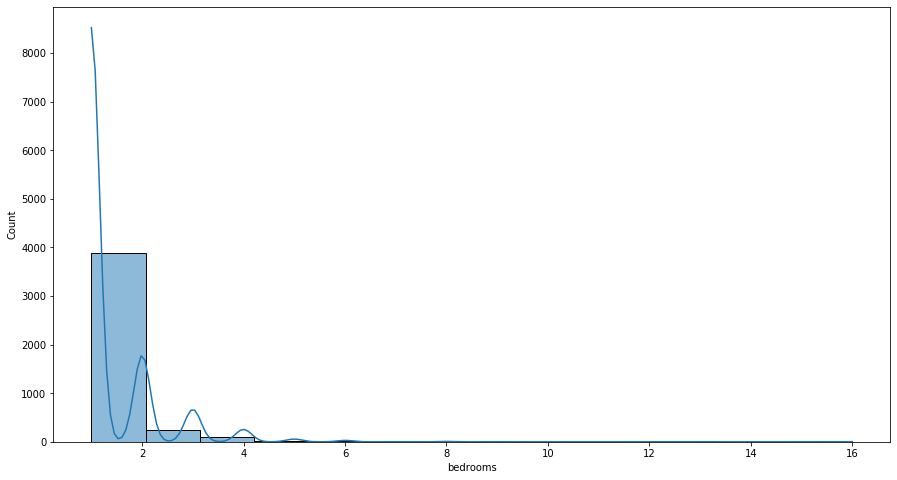

In [143]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_without_review.bedrooms,kde=True)

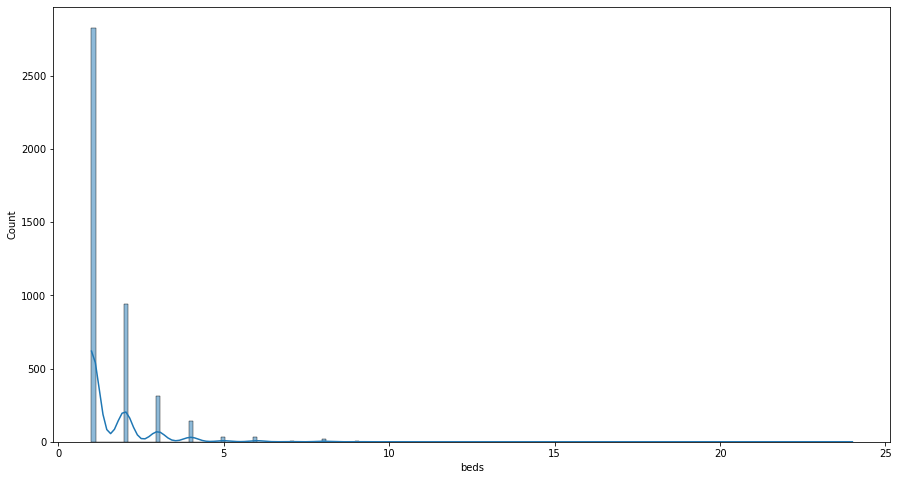

In [144]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_without_review.beds,kde=True)

In [145]:
df_without_review.bedrooms = df_without_review.bedrooms.fillna(1)
df_without_review.beds = df_without_review.beds.fillna(1)

In [155]:
df_without_review.host_acceptance_rate = df2.host_acceptance_rate[df2.first_review.isna()]
df_without_review.host_acceptance_rate = df_without_review['host_acceptance_rate'].str.strip("%").astype(float)

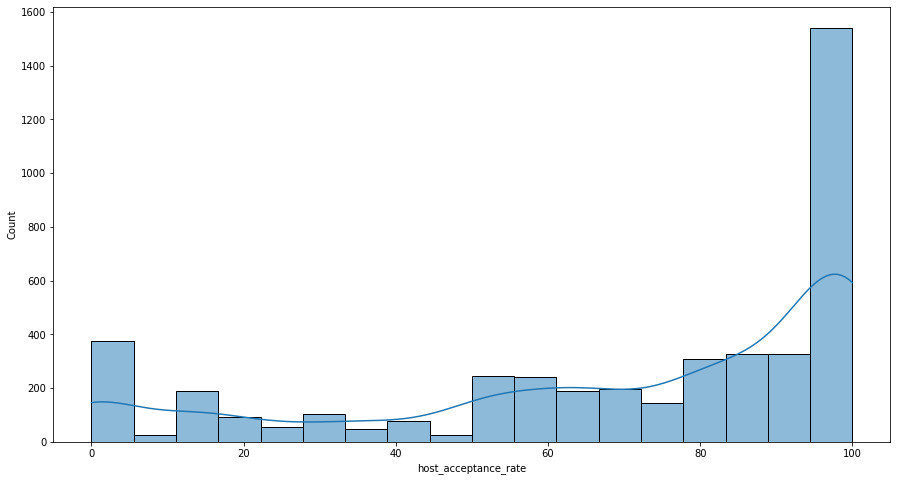

In [156]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_without_review.host_acceptance_rate,kde=True)

In [159]:
## drop na for maximum_maximum_nights
df_without_review = df_without_review[df_without_review.maximum_maximum_nights.notna()]

In [161]:
df_without_review = df_without_review[df_without_review.bathrooms_text.notna()]

In [168]:
df_without_review.host_acceptance_rate = df_without_review.host_acceptance_rate.fillna(83)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [217]:
df_without_review = df_without_review.drop(columns=['bathrooms_text'])

In [290]:
df_without_review = df_without_review.drop(columns=['neighbourhood_cleansed'])

In [281]:
df_without_review.price = df_without_review['price'].str.strip('$').str.replace(',', '').astype(float)

In [282]:
df_without_review.price.describe()

count     4752.000000
mean       215.647727
std        378.812910
min         20.000000
25%         62.750000
50%        125.000000
75%        250.000000
max      10000.000000
Name: price, dtype: float64

### df_with_review

In [257]:
df_with_review.isna().sum().sort_values(ascending=False)

reviews_per_month                               0
calculated_host_listings_count_shared_rooms     0
maximum_minimum_nights                          0
minimum_minimum_nights                          0
maximum_nights                                  0
minimum_nights                                  0
price                                           0
amenities                                       0
beds                                            0
bedrooms                                        0
accommodates                                    0
room_type                                       0
property_type                                   0
longitude                                       0
latitude                                        0
neighbourhood_group_cleansed                    0
neighbourhood_cleansed                          0
host_identity_verified                          0
host_has_profile_pic                            0
host_verifications                              0


In [223]:
df_with_review = df_with_review.drop(columns=['id', 'host_id','name','description',
                                              'host_since','host_name','host_neighbourhood'])

In [228]:
df_with_review = df_with_review.drop(columns=['bathrooms_text'])

In [288]:
df_with_review = df_with_review.drop(columns=['neighbourhood_cleansed'])

In [219]:
df_with_review = df_with_review[df_with_review.review_scores_accuracy.notna()]

In [221]:
df_with_review = df_with_review[df_with_review.minimum_minimum_nights.notna()]

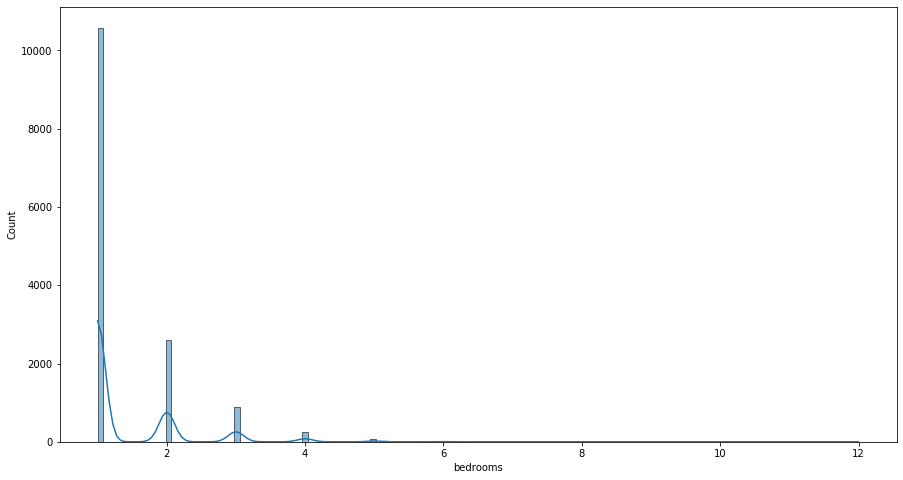

In [230]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_with_review.bedrooms,kde=True)

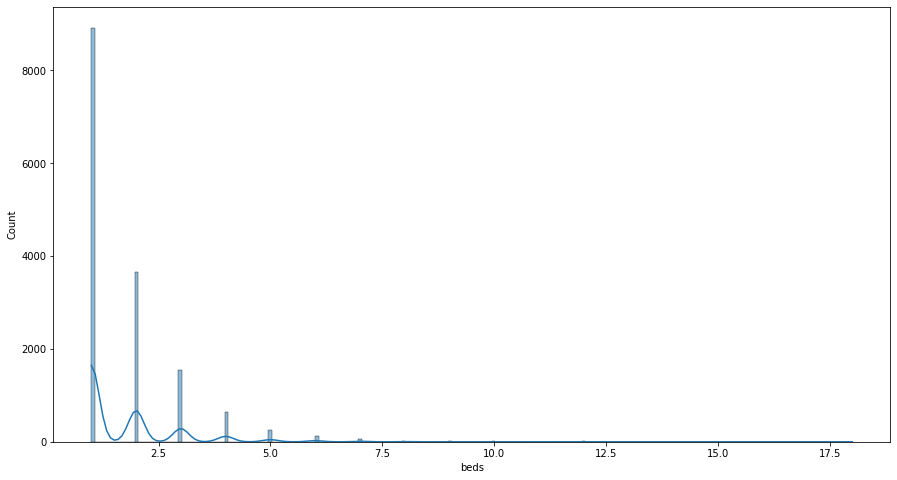

In [231]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_with_review.beds,kde=True)

In [246]:
prob = df_without_review.bedrooms.value_counts()/df_without_review.bedrooms.value_counts().sum()
pop = [1,2,3,4,5,6,8,16,7,9,13]

In [242]:
df_without_review.bedrooms.unique()

array([ 1.,  2.,  4.,  3.,  5.,  8., 13.,  9.,  6.,  7., 16.])

In [250]:
df_with_review.bedrooms = df_with_review.bedrooms.fillna(1)
df_with_review.beds = df_with_review.beds.fillna(1)

In [253]:
df_with_review.host_acceptance_rate = df_with_review['host_acceptance_rate'].str.strip("%").astype(float)

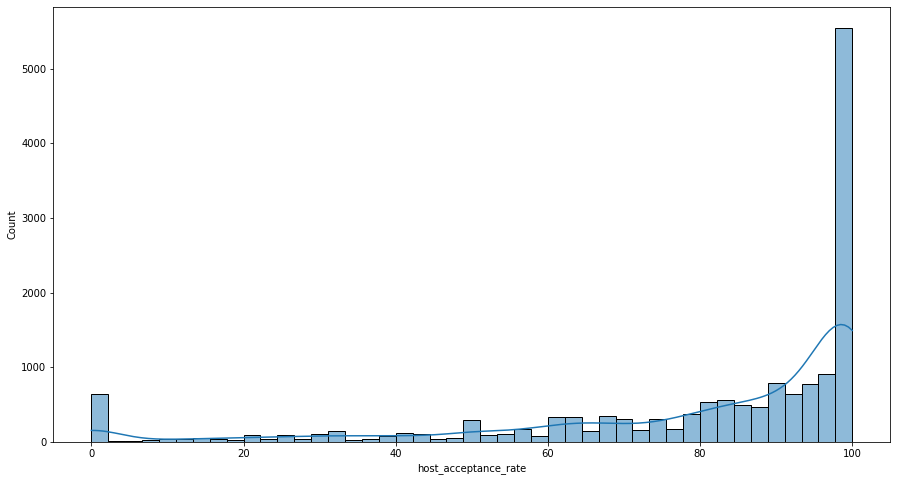

In [254]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_with_review.host_acceptance_rate,kde=True)

In [255]:
df_with_review.host_acceptance_rate.describe()

count    15798.000000
mean        80.048867
std         26.445749
min          0.000000
25%         71.000000
50%         91.000000
75%         99.000000
max        100.000000
Name: host_acceptance_rate, dtype: float64

In [256]:
df_with_review.host_acceptance_rate = df_with_review.host_acceptance_rate.fillna(91)

In [262]:
df_with_review.price = df2.price[-df2.first_review.isna()]

In [279]:
df_with_review.price = df_with_review['price'].str.strip('$').str.replace(',', '').astype(float)

In [280]:
df_with_review.price.describe()

count    16229.000000
mean       176.749646
std        265.119933
min          0.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

# Model Part
## Without review

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


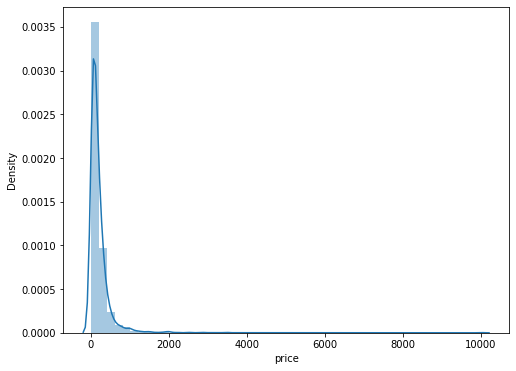

In [283]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
sns.distplot(df_without_review['price'], ax=ax)

In [284]:
df_without_review.neighbourhood_group_cleansed.value_counts()

Manhattan        2433
Brooklyn         1384
Queens            755
Bronx             135
Staten Island      45
Name: neighbourhood_group_cleansed, dtype: int64

In [285]:
df_without_review.neighbourhood_cleansed.value_counts()

Hell's Kitchen        408
Midtown               356
Bedford-Stuyvesant    313
Upper West Side       229
Upper East Side       224
                     ... 
Clifton                 1
Manhattan Beach         1
Edgemere                1
Bath Beach              1
Fort Wadsworth          1
Name: neighbourhood_cleansed, Length: 182, dtype: int64

In [287]:
df_wo_dum = pd.get_dummies(df_without_review.neighbourhood_group_cleansed, prefix='nbg')
df_wo_dum.head()

,nbg_Bronx,nbg_Brooklyn,nbg_Manhattan,nbg_Queens,nbg_Staten Island
8,0,0,1,0,0
12,0,0,1,0,0
262,0,0,1,0,0
285,0,1,0,0,0
590,0,0,1,0,0


In [291]:
df_wo_rt_dum = pd.get_dummies(df_without_review.room_type, prefix='rt')
df_wo_rt_dum.head()

,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room
8,0,0,1,0
12,0,0,1,0
262,1,0,0,0
285,1,0,0,0
590,1,0,0,0


In [293]:
df_without_review = df_without_review.drop(columns=['property_type'])

In [297]:
df_without_review = df_without_review.drop(columns=['host_name','host_verifications'])
df_without_review = df_without_review.drop(columns=['calendar_last_scraped'])
df_without_review = df_without_review.drop(columns=['amenities'])

In [309]:
df_wo_rep_dum = pd.get_dummies(df_without_review.host_response_time, prefix='rp_time')
df_wo_rep_dum.head()

,rp_time_a few days or more,rp_time_within a day,rp_time_within a few hours,rp_time_within an hour
8,0,0,0,1
12,0,1,0,0
262,1,0,0,0
285,0,0,0,1
590,1,0,0,0


In [320]:
tf_mapping = {'t':1,
              'f':0}

wo_features = pd.DataFrame()
wo_features['host_is_superhost'] = df_without_review['host_is_superhost'].map(tf_mapping)
wo_features['host_has_profile_pic'] = df_without_review['host_has_profile_pic'].map(tf_mapping)
wo_features['host_identity_verified'] = df_without_review['host_identity_verified'].map(tf_mapping)
wo_features['has_availability'] = df_without_review['has_availability'].map(tf_mapping)
wo_features['instant_bookable'] = df_without_review['instant_bookable'].map(tf_mapping)
wo_features.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
8,0,1,1,1,0
12,0,1,1,1,0
262,0,1,1,1,0
285,1,1,1,1,1
590,0,1,0,1,0


In [324]:
df_wo = df_without_review.drop(columns=['neighbourhood_group_cleansed','room_type','host_response_time',
                           'host_is_superhost','host_has_profile_pic','host_identity_verified',
                           'has_availability','instant_bookable'])

In [331]:
df_wo_reg = df_wo.join(df_wo_rt_dum).join(df_wo_dum).join(df_wo_rep_dum).join(wo_features)

In [332]:
np.shape(df_wo_reg)

(4752, 44)

In [339]:
lp = np.log(df_wo_reg.price)

In [340]:
### outlier
lp25,lp75 = lp.quantile(.25),lp.quantile(.75)
liqr = lp75 - lp25
liqr.round(2)

1.38

In [341]:
print(lp75+(1.5*liqr))
print(lp25-(1.5*liqr))

7.594950333073232
2.065645225843937


In [342]:
df_wo_reg = df_wo_reg[(lp<lp75+(1.5*liqr)) & (lp>lp25-(1.5*liqr))] 

In [343]:
df_wo_reg.shape

(4716, 44)

In [344]:
X_wo = df_wo_reg.drop(columns=['price'])
y_wo = np.log(df_wo_reg.price)

In [363]:
X_wo = X_wo.drop(columns=['minimum_minimum_nights', 'maximum_minimum_nights',
                          'minimum_maximum_nights', 'maximum_maximum_nights'])

In [345]:
## Train test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [365]:
x_wo_train,x_wo_test,y_wo_train,y_wo_test=train_test_split(X_wo,y_wo,test_size=.3,random_state=123)

In [418]:
from sklearn.decomposition import PCA
pca_wo = PCA(n_components=6).fit(x_wo_train)

In [419]:
pca_wo.explained_variance_ratio_.round(3)

array([0.136, 0.105, 0.081, 0.061, 0.058, 0.053])

In [420]:
pca_wo.components_[0].round(4)
## not a good result, so we directly use lr

array([ 0.1549,  0.1563,  0.332 ,  0.332 ,  0.0885, -0.1358,  0.006 ,
       -0.0048, -0.0132,  0.089 ,  0.1381,  0.3701, -0.0016, -0.1376,
       -0.1535, -0.1447,  0.0085,  0.3305,  0.3731, -0.0118, -0.0416,
        0.1471,  0.0073, -0.1387, -0.0395, -0.0399, -0.1274,  0.1945,
       -0.0821, -0.0194, -0.1348, -0.0581, -0.0835,  0.2142, -0.0277,
        0.0402,  0.0809,  0.0089,  0.1954])

In [361]:
pca_wo.components_[2].round(4)

array([ 0.    , -0.    ,  0.    ,  0.    , -0.    , -0.    , -0.    ,
        0.    , -0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.6089,
       -0.2082,  0.    ,  0.7654,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    , -0.    ,  0.    ,  0.    ,
       -0.    ,  0.    ,  0.    ,  0.    , -0.    , -0.    , -0.    ,
       -0.    ])

In [370]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_wo_train = pd.DataFrame(ss.fit_transform(x_wo_train),columns=x_wo_train.columns)

x_wo_test = ss.transform(x_wo_test)

In [371]:
lr_wo = LinearRegression()
lr_wo.fit(x_wo_train,y_wo_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [375]:
params_wo = pd.Series(lr_wo.coef_, index=x_wo_train.columns)

In [377]:
params_wo.abs().sort_values(ascending=False)

host_total_listings_count                       3.242348e+12
host_listings_count                             3.242348e+12
nbg_Manhattan                                   8.015068e+11
nbg_Brooklyn                                    7.370484e+11
nbg_Queens                                      5.835189e+11
nbg_Bronx                                       2.760758e+11
nbg_Staten Island                               1.570634e+11
rp_time_within an hour                          6.431663e+10
rp_time_within a few hours                      6.309083e+10
rp_time_within a day                            4.436804e+10
rp_time_a few days or more                      4.401358e+10
rt_Entire home/apt                              1.502001e+10
rt_Private room                                 1.498798e+10
rt_Shared room                                  3.671471e+09
rt_Hotel room                                   1.882714e+09
calculated_host_listings_count_entire_homes     4.816272e-01
calculated_host_listings

In [378]:
y_wo_pred_train = lr_wo.predict(x_wo_train)
print('MAE: %f'% mean_absolute_error(y_wo_train, y_wo_pred_train))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_wo_train, y_wo_pred_train)))   
print('R2 %f' % r2_score(y_wo_train, y_wo_pred_train))

MAE: 0.351254
RMSE: 0.483034
R2 0.703047


In [379]:
y_wo_pred=lr_wo.predict(x_wo_test)
print('MAE: %f'% mean_absolute_error(y_wo_test, y_wo_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_wo_test, y_wo_pred)))   
print('R2 %f' % r2_score(y_wo_test, y_wo_pred))

MAE: 0.363776
RMSE: 0.492653
R2 0.690759


### With review

In [380]:
df_w_dum = pd.get_dummies(df_with_review.neighbourhood_group_cleansed, prefix='nbg')
df_w_dum.head()

,nbg_Bronx,nbg_Brooklyn,nbg_Manhattan,nbg_Queens,nbg_Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [381]:
df_w_rt_dum = pd.get_dummies(df_with_review.room_type, prefix='rt')
df_w_rt_dum.head()

,rt_Entire home/apt,rt_Hotel room,rt_Private room,rt_Shared room
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0


In [382]:
df_w_rep_dum = pd.get_dummies(df_with_review.host_response_time, prefix='rp_time')
df_w_rep_dum.head()

,rp_time_a few days or more,rp_time_within a day,rp_time_within a few hours,rp_time_within an hour
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [386]:
df_w = df_with_review.drop(columns=['neighbourhood_group_cleansed','room_type','host_response_time',
                                        'host_is_superhost','host_has_profile_pic','host_identity_verified',
                                        'has_availability','instant_bookable','minimum_minimum_nights', 
                                        'maximum_minimum_nights','minimum_maximum_nights', 'maximum_maximum_nights',
                                       'property_type','host_verifications','calendar_last_scraped',
                                       'amenities'])

In [388]:
tf_mapping = {'t':1,
              'f':0}

w_features = pd.DataFrame()
w_features['host_is_superhost'] = df_with_review['host_is_superhost'].map(tf_mapping)
w_features['host_has_profile_pic'] = df_with_review['host_has_profile_pic'].map(tf_mapping)
w_features['host_identity_verified'] = df_with_review['host_identity_verified'].map(tf_mapping)
w_features['has_availability'] = df_with_review['has_availability'].map(tf_mapping)
w_features['instant_bookable'] = df_with_review['instant_bookable'].map(tf_mapping)
w_features.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,0,1,1,1,0
1,0,1,1,1,0
2,0,1,1,1,0
3,0,1,1,1,0
4,0,1,0,1,0


In [393]:
df_w = df_w.drop(columns=['first_review', 'last_review'])

In [396]:
df_w.shape

(16229, 33)

In [397]:
df_w_reg = df_w.join(df_w_rt_dum).join(df_w_dum).join(df_w_rep_dum).join(w_features)

In [398]:
lp = np.log(df_w_reg.price)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [399]:
### outlier
lp25,lp75 = lp.quantile(.25),lp.quantile(.75)
liqr = lp75 - lp25
liqr.round(2)

0.98

In [400]:
print(lp75+(1.5*liqr))
print(lp25-(1.5*liqr))

6.769561246065626
2.846244234018721


In [404]:
df_w_reg = df_w_reg[(lp<lp75+(1.5*liqr)) & (lp>lp25-(1.5*liqr))]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [405]:
df_w_reg.shape

(15998, 51)

In [406]:
X_w = df_w_reg.drop(columns=['price'])
y_w = np.log(df_w_reg.price)

In [407]:
x_w_train,x_w_test,y_w_train,y_w_test=train_test_split(X_w,y_w,test_size=.3,random_state=123)

In [408]:
pca_w = PCA(n_components=6).fit(x_w_train)

In [410]:
pca_w.explained_variance_ratio_.round(4)

array([1., 0., 0., 0., 0., 0.])

In [412]:
ss = StandardScaler()
x_w_train = pd.DataFrame(ss.fit_transform(x_w_train),columns=x_w_train.columns)

x_w_test = ss.transform(x_w_test)

In [413]:
lr_w = LinearRegression()
lr_w.fit(x_w_train,y_w_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
params_w = pd.Series(lr_w.coef_, index=x_w_train.columns)

In [415]:
params_w.abs().sort_values(ascending=False)

rp_time_within an hour                          2.057506e+11
rp_time_within a few hours                      1.732892e+11
rp_time_within a day                            1.472273e+11
rp_time_a few days or more                      9.878948e+10
nbg_Manhattan                                   8.373767e+10
nbg_Brooklyn                                    8.264996e+10
host_listings_count                             7.142032e+10
host_total_listings_count                       7.142032e+10
rt_Entire home/apt                              6.432465e+10
rt_Private room                                 6.395422e+10
nbg_Queens                                      6.345209e+10
nbg_Bronx                                       3.314632e+10
nbg_Staten Island                               1.993208e+10
rt_Shared room                                  1.426522e+10
rt_Hotel room                                   1.051398e+10
calculated_host_listings_count                  7.138901e-01
calculated_host_listings

In [416]:
y_w_pred_train = lr_w.predict(x_w_train)
print('MAE: %f'% mean_absolute_error(y_w_train, y_w_pred_train))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_w_train, y_w_pred_train)))   
print('R2 %f' % r2_score(y_w_train, y_w_pred_train))

MAE: 0.317654
RMSE: 0.415657
R2 0.630854


In [417]:
y_w_pred=lr_w.predict(x_w_test)
print('MAE: %f'% mean_absolute_error(y_w_test, y_w_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_w_test, y_w_pred)))   
print('R2 %f' % r2_score(y_w_test, y_w_pred))

MAE: 0.319106
RMSE: 0.420199
R2 0.624029


### below is previous analysis

In [37]:
# delete price outlier
p25,p75 = df_pdum2.price.quantile(.25),df_pdum2.price.quantile(.75)
iqr = p75 - p25
iqr.round(2)

106.0

In [38]:
print(p75+(1.5*iqr))
print(p25-(1.5*iqr))

334.0
-90.0


In [52]:
df_pdum2[(df_pdum2.price< p75+(1.5*iqr)) & (df_pdum2.price > p25-(1.5*iqr))].shape

(45903, 21)

In [42]:
log_price=np.log(df_pdum2.price)

In [43]:
lp25,lp75 = log_price.quantile(.25),log_price.quantile(.75)
liqr = lp75 - lp25
liqr.round(2)

0.93

In [44]:
print(lp75+(1.5*liqr))
print(lp25-(1.5*liqr))

6.560805177912897
2.8380873006078775


In [54]:
df_pdum2[(log_price<lp75+(1.5*liqr)) & (log_price>lp25-(1.5*liqr))].shape

(48242, 21)

In [55]:
log_price[(log_price<lp75+(1.5*liqr)) & (log_price>lp25-(1.5*liqr))].shape

(48242,)

In [57]:
df_pdum2.availability_365.describe()

count    48879.000000
mean       112.788989
std        131.613322
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

In [123]:
av_p,av_p75 = df_pdum2.availability_365.quantile(.05),df_pdum2.availability_365.quantile(.95)
print(av_p25)
print(av_p75)

0.0
359.0


In [58]:
## add some features here
df_pdum2['all_year_avail'] = df_pdum2['availability_365']>353
df_pdum2['low_avail'] = df_pdum2['availability_365']< 12
df_pdum2.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,nbg_Bronx,nbg_Brooklyn,nbg_Manhattan,nbg_Queens,nbg_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room,all_year_avail,low_avail
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,0,1,0,0,0,0,1,0,True,False
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,0,0,1,0,0,1,0,0,True,False
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,0,0,1,0,0,0,1,0,True,False
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,0,1,0,0,0,1,0,0,False,False
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,0,1,0,0,1,0,0,False,True


In [60]:
## drop outliers and drop columns do not need
df_forR = df_pdum2[(log_price<lp75+(1.5*liqr)) & (log_price>lp25-(1.5*liqr))]
df_forR.shape

(48242, 23)

In [63]:
mapping = {True:1,
           False:0}

In [65]:
df_forR['all_year'] = df_forR.all_year_avail.map(mapping)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_forR.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,nbg_Brooklyn,nbg_Manhattan,nbg_Queens,nbg_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room,all_year_avail,low_avail,all_year
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,1,0,0,0,0,1,0,True,False,1
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,0,1,0,0,1,0,0,True,False,1
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,0,1,0,0,0,1,0,True,False,1
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,1,0,0,0,1,0,0,False,False,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,0,1,0,0,1,0,0,False,True,0


In [67]:
df_forR['low_available'] = df_forR.low_avail.map(mapping)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
df_forR.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,nbg_Manhattan,nbg_Queens,nbg_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room,all_year_avail,low_avail,all_year,low_available
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,...,0,0,0,0,1,0,True,False,1,0
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,...,1,0,0,1,0,0,True,False,1,0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,...,1,0,0,0,1,0,True,False,1,0
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,...,0,0,0,1,0,0,False,False,0,0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,...,1,0,0,1,0,0,False,True,0,1


In [69]:
df_forR.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'nbg_Bronx',
       'nbg_Brooklyn', 'nbg_Manhattan', 'nbg_Queens', 'nbg_Staten Island',
       'rt_Entire home/apt', 'rt_Private room', 'rt_Shared room',
       'all_year_avail', 'low_avail', 'all_year', 'low_available'],
      dtype='object')

In [79]:
## prepare X and y
X = df_forR[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'nbg_Bronx',
       'nbg_Brooklyn', 'nbg_Manhattan', 'nbg_Queens', 'nbg_Staten Island',
       'rt_Entire home/apt', 'rt_Private room', 'rt_Shared room','all_year', 'low_available' ]]

In [80]:
X.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,nbg_Bronx,nbg_Brooklyn,nbg_Manhattan,nbg_Queens,nbg_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room,all_year,low_available
0,1,9,0.21,6,365,0,1,0,0,0,0,1,0,1,0
1,1,45,0.38,2,355,0,0,1,0,0,1,0,0,1,0
2,3,0,0.00,1,365,0,0,1,0,0,0,1,0,1,0
3,1,270,4.64,1,194,0,1,0,0,0,1,0,0,0,0
4,10,9,0.10,1,0,0,0,1,0,0,1,0,0,0,1


In [81]:
y = np.log(df_forR.price)

In [94]:
## Train test split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2022)

In [86]:
x_train.shape

(38593, 15)

In [87]:
x_test.shape

(9649, 15)

In [88]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
params = pd.Series(lr.coef_, index=X.columns)
params

minimum_nights                   -0.002361
number_of_reviews                -0.000401
reviews_per_month                -0.011773
calculated_host_listings_count    0.000444
availability_365                  0.000188
nbg_Bronx                        -0.189374
nbg_Brooklyn                      0.072293
nbg_Manhattan                     0.372392
nbg_Queens                       -0.060762
nbg_Staten Island                -0.194549
rt_Entire home/apt                0.643864
rt_Private room                  -0.121576
rt_Shared room                   -0.522287
all_year                          0.160557
low_available                    -0.102008
dtype: float64

In [97]:
y_pred_train = lr.predict(x_train)
print('MAE: %f'% mean_absolute_error(y_train, y_pred_train))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_train, y_pred_train)))   
print('R2 %f' % r2_score(y_train, y_pred_train))

MAE: 0.345033
RMSE: 0.448479
R2 0.517411


In [95]:
y_pred=lr.predict(x_test)
print('MAE: %f'% mean_absolute_error(y_test, y_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, y_pred)))   
print('R2 %f' % r2_score(y_test, y_pred))

MAE: 0.343769
RMSE: 0.443962
R2 0.523268
